<center>
<img src="https://i.ibb.co/b3T5hkz/logo.png" alt="logo" border="0" width=600>

# W03A. Datos y Fundamentos de Estadistica

---

## A. Descargando los Datos 

Este ejercicio esta basado en los desarrollos del paper

J. R. Trump et. al. *Accretion Rate and the Physical Nature of Unobscured Active Galaxies*. [ApJ 733 60 (2011)](https://ui.adsabs.harvard.edu/abs/2011ApJ...733...60T/abstract)

- Ingrese a la página 

[https://vizier.cds.unistra.fr/viz-bin/VizieR?-source=J/ApJ/733/60](https://vizier.cds.unistra.fr/viz-bin/VizieR?-source=J/ApJ/733/60)

y descargue el archivo de datos, preferiblemente en el formato de `table2.dat` junto con el archivo `ReadMe` correspondiente.

- Lea el archivo e identifique las cantidades físicas reportadas en la tabla de datos mediante la funciín [astropy.io.ascii.read()](https://docs.astropy.org/en/stable/api/astropy.io.ascii.read.html). Cuantos objetos están catalogados en este archivo?

- Realice una gráfica del logaritmo de la luminosidad de acreción, $\log L$, contra el logaritmo de la masa del agujero negro en masas solares, $\log M$, e incluyendo las líneas de error respectivas. Utilice los siguientes marcadores para la figura, dependiendo del tipo de objeto presentado en la columna 'Type': Para AGNs de líneas anchas (Broad-line) utilice cruces negras, para AGNs de líneas delgadas (Narrow-line) utilice diamantes azules y para AGNs sin lineas (lineless) utilice cuadrados rojos.  





In [1]:
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


data2 = ascii.read('J_ApJ_733_60/table2.dat', readme='J_ApJ_733_60/ReadMe')
data2

RAh,RAm,RAs,DE-,DEd,DEm,DEs,Type,z,r_z,logL,e_logL,E_logL,logM,e_logM,E_logM,logAcc,e_logAcc,E_logAcc
h,min,s,,deg,arcmin,arcsec,,,,[10-7W],[10-7W],[10-7W],dex(Msun),dex(Msun),dex(Msun),dex(---),dex(---),dex(---)
int64,int64,float64,str1,int64,int64,float64,str2,float64,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64
9,57,28.34,+,2,25,42.2,BL,1.54,S,46.03,0.1,0.52,8.4,0.43,0.36,-0.49,0.27,0.58
9,57,40.78,+,2,2,7.9,BL,1.48,I,45.88,0.3,0.64,8.24,0.39,0.45,-0.47,0.4,0.68
9,57,43.33,+,2,48,23.8,BL,1.36,S,45.84,0.16,0.66,8.24,0.36,0.44,-0.51,0.66,0.18
9,57,49.02,+,1,53,10.1,NL,0.32,I,43.89,0.21,0.71,8.61,0.3,0.29,-2.84,0.15,0.73
9,57,50.2,+,2,25,48.3,BL,1.24,Z,44.93,0.2,0.52,7.28,0.41,0.38,-0.46,0.28,0.6
9,57,52.17,+,1,51,20.1,BL,4.16,Z,46.28,0.1,0.69,8.71,0.42,0.41,-0.54,0.36,0.53
9,57,52.17,+,1,51,20.1,BL,4.17,I,46.26,0.07,0.54,8.66,0.44,0.38,-0.51,0.31,0.52
9,57,53.49,+,2,47,36.1,BL,3.61,I,46.24,0.27,0.75,8.0,0.4,0.49,0.12,0.46,0.69


In [3]:
# Define the markers and colors for the plot accoring 
# to the 'Type' column

markers = {'BL':'k+',
            'NL':'bD',
            'OD':'rs'}
m = []
for d in data2:
    m.append(markers[d['Type']])

data2.add_column(m, name='markers')
data2

RAh,RAm,RAs,DE-,DEd,DEm,DEs,Type,z,r_z,logL,e_logL,E_logL,logM,e_logM,E_logM,logAcc,e_logAcc,E_logAcc,markers
h,min,s,,deg,arcmin,arcsec,,,,[10-7W],[10-7W],[10-7W],dex(Msun),dex(Msun),dex(Msun),dex(---),dex(---),dex(---),
int64,int64,float64,str1,int64,int64,float64,str2,float64,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,str2
9,57,28.34,+,2,25,42.2,BL,1.54,S,46.03,0.1,0.52,8.4,0.43,0.36,-0.49,0.27,0.58,k+
9,57,40.78,+,2,2,7.9,BL,1.48,I,45.88,0.3,0.64,8.24,0.39,0.45,-0.47,0.4,0.68,k+
9,57,43.33,+,2,48,23.8,BL,1.36,S,45.84,0.16,0.66,8.24,0.36,0.44,-0.51,0.66,0.18,k+
9,57,49.02,+,1,53,10.1,NL,0.32,I,43.89,0.21,0.71,8.61,0.3,0.29,-2.84,0.15,0.73,bD
9,57,50.2,+,2,25,48.3,BL,1.24,Z,44.93,0.2,0.52,7.28,0.41,0.38,-0.46,0.28,0.6,k+
9,57,52.17,+,1,51,20.1,BL,4.16,Z,46.28,0.1,0.69,8.71,0.42,0.41,-0.54,0.36,0.53,k+
9,57,52.17,+,1,51,20.1,BL,4.17,I,46.26,0.07,0.54,8.66,0.44,0.38,-0.51,0.31,0.52,k+
9,57,53.49,+,2,47,36.1,BL,3.61,I,46.24,0.27,0.75,8.0,0.4,0.49,0.12,0.46,0.69,k+


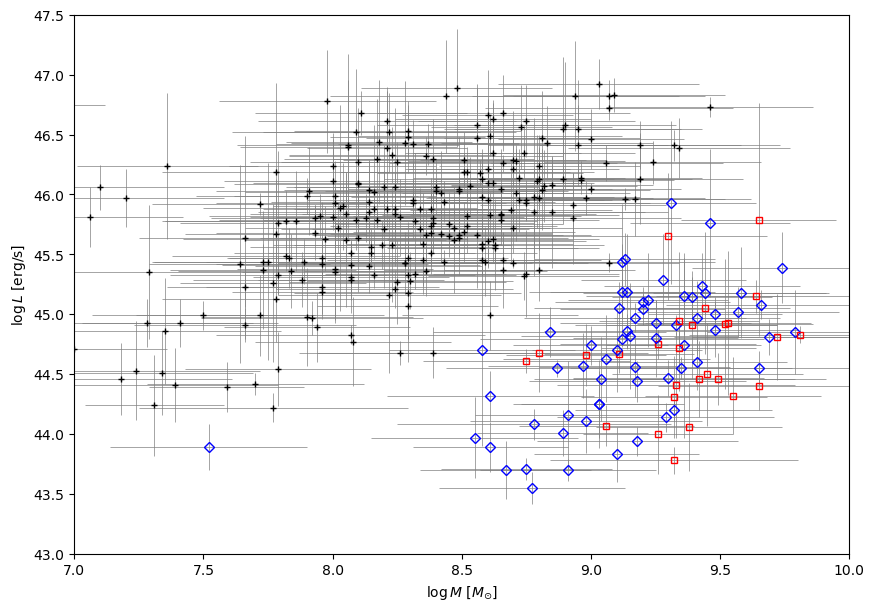

In [4]:
plt.figure(figsize=(10,7))
for d in data2:
    plt.errorbar(d['logM'], d['logL'], 
                 d['e_logL'], d['e_logM'], 
                 fmt=d['markers'], markersize=5,
                 markerfacecolor='none',
                 markeredgewidth=1,
                 ecolor='gray', elinewidth=0.5)

plt.xlabel(r'$\log M$ [$M_{\odot}$]')
plt.ylabel(r'$\log L$ [erg/s]')
plt.xlim(7,10)
plt.ylim(43,47.5)
plt.show()

## B. Cantidades Estadisticas

1. Extraiga la información correspondiente únicamente a los AGNs de líneas anchas (Broad-line) y obtenga cuántos de estos objetos se tienen en la muestra.

2. Obtendremos ahora una función de densidad de probabilidad con esta muestra de AGNs. Para ello, realice un histograma para los AGNs de líneas anchas ubicando en el eje vertical la densidad de objetos (i,e, el conteo normalizado) y en el eje horizontal el logaritmo de la masa del objeto central y utilice 20 bins.

3. Calcule los momentos de la distribución obtenida:
   - Promedio
   - Desviación Standard y Varianza
   - Skewness
   - Kurtosis 

In [5]:
# Mascara para elegir únicamente los AGNs BL
mask = data2['Type']=='BL' 

In [7]:
# Extramos en un arreglo la información del los AGNs BL
dataBL = [data2['logM'][i] for i in range(len(data2['logM'])) if data2['Type'][i]=='BL']
len(dataBL) 

256

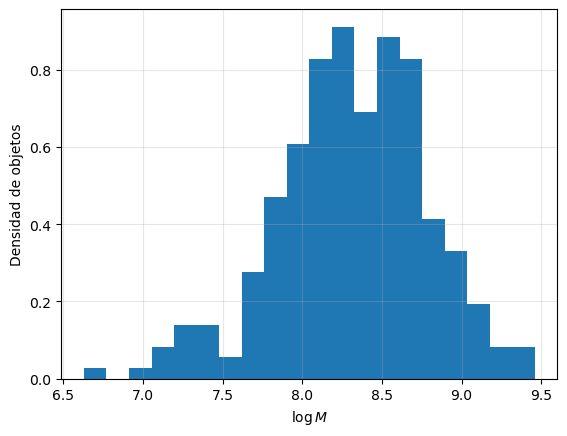

In [8]:
plt.figure()
plt.hist(dataBL, bins=20, density=True)
plt.xlabel(r'$\log M$')
plt.ylabel(r'Densidad de objetos')
plt.grid(alpha=0.3)
plt.show()

In [9]:
from scipy.stats import kurtosis, skew
# Momentos Estadísticos
print('El promedio de la distribución es:', np.mean(dataBL))
print('La desviación standard de la distribución es:', np.std(dataBL))
print('La varianza de la distribución es:', np.var(dataBL))
print('El Asimetría Estadística (skewness) de la distribución es:', skew(dataBL))
print('La kurtosis de la distribución es:', kurtosis(dataBL))


El promedio de la distribución es: 8.311171875
La desviación standard de la distribución es: 0.47227527905765343
La varianza de la distribución es: 0.2230439392089844
El Asimetría Estadística (skewness) de la distribución es: -0.4419016150048759
La kurtosis de la distribución es: 0.39148969258571764


In [11]:
from scipy.stats import rv_histogram

histo = np.histogram(dataBL, bins=20, density=True)
histo_dist = rv_histogram(histo, density=True)

In [12]:
mean, var, skew, kurt = histo_dist.stats(moments='mvsk')
print('mean = ', mean)
print('var = ', var)
print('skew = ', skew)
print('kurt = ', kurt)

mean =  8.313628906249999
var =  0.221706742497787
skew =  -0.3919356124944967
kurt =  0.3461128741442483


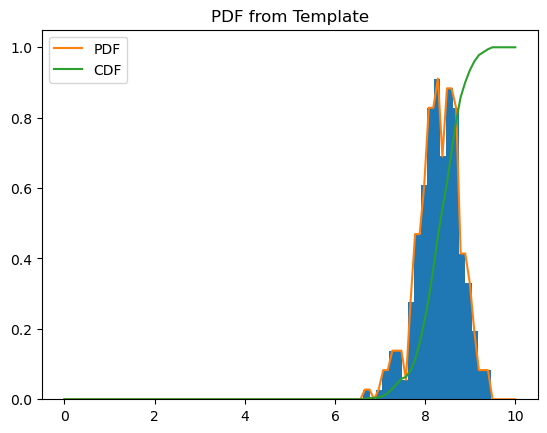

In [21]:
X = np.linspace(0, 10, 100)
fig, ax = plt.subplots()
ax.set_title("PDF from Template")
ax.hist(dataBL, density=True, bins=20)
ax.plot(X, histo_dist.pdf(X), label='PDF')
#ax.plot(X, histo_dist.cdf(X), label='CDF')
ax.legend()
fig.show()